IMDB 리뷰데이터셋 

영어로 된 문장이지만 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어 있음 

In [28]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

훈련세트와 테스트 세트의 크기를 확인 

In [29]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


첫 번째 리뷰의 길이 확인 

In [30]:
print(len(train_input[0]))

218


두 번째 리뷰의 길이 확인 

In [31]:
print(len(train_input[1]))

189


첫 번째 리뷰에 담긴 내용을 출력 

In [32]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


IMDB 리뷰데이터는 이미 정수로 변환, num_word=500으로 지정했기 때문에 어휘 사전에는 500개의 단어만 들어가 있음

->imdb.load_data()는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 나열한 다음 가장 많이 등장한 500개의 단어를 선택 

타깃 데이터 출력 

In [33]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


해결해야할 문제? 리뷰가 긍정인지 부정인지 판단 , 이진 분류 문제로 볼 수 있으므로 타깃값이 0(부정) 또는 1(긍정)로 나누어짐 

In [34]:
from sklearn.model_selection import train_test_split 
train_input, val_input, train_target, val_target  = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

각 리뷰의 길이 계산해 넘파이배열에 담는다 

-? 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인하고 싶기 때문  

In [35]:
import numpy as np
lengths= np.array([len(x) for x in train_input])

lenghts 배열이 준비, 넘파이 mean() 함수와 median()함수를 사용해 리뷰 길이의 평균과 중간값 구해보기 

In [36]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 평균 단어 개수는 239개이고, 중간값이 178인 것으로 보아 이 리뷰의 길이 데이터는 한쪽에 치우친 분포를 보일 것 같지만 히스토그램으로 확인! 

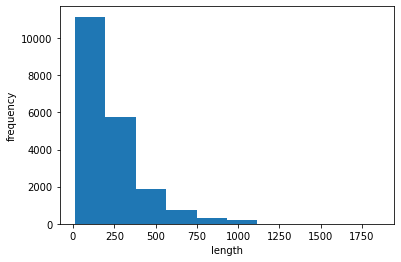

In [37]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

대부분의 리뷰는 300 미만, 평균이 중간값보다 높은 이유는 오른쪽 끝에 큰 데이터가 있기 때문이다. 

리뷰는 대부분 짧아서 이 예제에서는 중간값보다 훨씬 짧은 100개의 단어만 사용할것임

100개의 단어보다 작은 리뷰들의 길이를 100으로 맞추기 위해 패딩을 사용한다 

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩

train_seq의 크기를 확인 

In [39]:
print(train_seq.shape)

(20000, 100)


train_input은 파이썬의 리스트 배열이였지만 길이를 100으로 맞춘 train_seq는 (20000, 100) 크기의 2차원 배열이 되었음 

train_seq의 첫 번째 샘플 출력 

In [40]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


샘플의 앞뒤에 패딩값 0이 없는 것으로 보아 100보다는 길었을 것, train_input에 있는 원본 샘플의 끝을 확인하기 

In [41]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


train_input[0]에 있는 마지막 10개의 토큰을 출력, train_seq[0]의 출력값과 비교하면 정확히 일치함 -> 샘플의 앞부분이 잘렸다는 것을 짐작할 수 있음 


pad_sequence() 함수는 기본으로 maxlen보다 긴 시퀀스의 앞 부분을 자름 -> 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문 

시퀀스의 뒷부분을 잘라내고 싶다면 pad_sequence() 함수의 truncating 매개변수의 값을 기본값이 'pre'가 아닌 'post'로 바꾸어라


train_seq에 있는 여섯번째 샘플출력 

In [42]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


앞부분에 0이 있는 것으로 보아 샘플의 길이는 100이 안됨

같은 이유로 패딩 토큰은 시퀀스의 뒷부분이 아니라 앞부분에 추가되면 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치게 되므로 마지막에 패딩을 추가하는 것은 일반적으로 선호하지 않음 



검증 세트의 길이도 100으로 맞추기 

In [43]:
val_seq= pad_sequences(val_input, maxlen=100)

### 순환신경망 만들기 

IMDB 리뷰 분류 문제는 이진 분류이므로 마지막 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수를 사용해야한다 

In [44]:
from tensorflow import keras 
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

SimpleRNN 클래스를 사용하였고, 첫 번째 매개변수로 input_shape 입력 차원을 (100,500)으로 지정한 것은 첫 번째 차원이 100인 이유는 샘플의 길이를 100으로 지정했기 때문이고 이전 섹션에서의 imdb.load_data()함수에서 500개의 단어만 사용하도록 지정했기에 500, 

순환층은 활성화 함수로 activation 매개변수의 기본값으로 'tanh'함수를 사용 




원핫 인코딩 배열로 반환하기 

In [45]:
train_oh= keras.utils.to_categorical(train_seq)

배열의 크기 출력

In [46]:
print(train_oh.shape)

(20000, 100, 500)


정수 하나마다 모두 500차원의 배열로 변경, (20000, 100) 크기의 train_seq가 (20000, 100, 500) 크기의 train_oh로 바뀜 

샘플 데이터의 크기가 1차원인 정수 배열(100,)에서 2차원 배열(100, 500)으로 바꾸어야하므로 SimpleRNN 클래스의 input_shape 매개변수 값을 (100, 500)으로 지정한 것 

train_oh의 첫번째 샘플의 첫번째 토큰 10이 잘 인코딩되었는지 출력

In [47]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


처음 12개 원소를 출력해보면 11번째 원소가 1인 것을 확인, 나머지 원소는 모두 0인지 넘파이 sum()함수로 모든 원소의 값을 더해서 1이 되는지 확인 

In [48]:
print(np.sum(train_oh[0][0]))

1.0


토큰 10이 잘 인코딩 되었음을 확인하였음 
열한 번째 원소만 1이고 나머지는 0이여서 원핫 인코딩을 더한 값이 1이 됨 

val_seq도 원-핫 인코딩 

In [49]:
val_oh = keras.utils.to_categorical(val_seq)

만든 모델의 구조를 출력 

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


SimpleRNN에 전달한 샘플의 크기는 (100, 500) 이지만 순환층은 마지막 타임스텝의 은닉상태만 출력함, 그래서 출력크기가 뉴런개수와 동일한 8임을 알 수 있음 

모델 파라미터의 개수를 계산해보면 
입력토큰은 500차원의 원-핫인코딩 배열, 이 배열이 순환층의 뉴런 8개와 완전히 연결되기 때문, 총 500 x 8 = 4000개의 가중치가 있다 
순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱햊ㄴ다 
이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8(은닉 상태 크기) x 8(뉴런개수) = 64개의 가중치가 필요함 

마지막으로 뉴런마다 하나의 절편이 있으므로 
4000 + 64 + 8 = 4072개의 모델 파라미터가 필요 

### 순환신경망 훈련하기


기본 RMSprop의 학습률 0.0001을 사용하지 않기 위해 별도의 RMSprop 객체를 만들어 학습률을 0.0001로 지정, 그 다음 에포크의 횟수를 100으로 늘리고 배치 크기는 64개로 설정, 그 밖에 체크포인트와 조기 종료를 구성하는 코드는 거의 동일 

In [51]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simpernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                restore_best_weights=True)
history= model.fit(train_oh, train_target, epochs=100, batch_size=64, 
                   validation_data=(val_oh, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 79ms/step - loss: 0.6980 - accuracy: 0.5048 - val_loss: 0.6999 - val_accuracy: 0.4980
Epoch 2/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6952 - accuracy: 0.5125 - val_loss: 0.6979 - val_accuracy: 0.5004
Epoch 3/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6931 - accuracy: 0.5197 - val_loss: 0.6963 - val_accuracy: 0.5028
Epoch 4/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6913 - accuracy: 0.5278 - val_loss: 0.6951 - val_accuracy: 0.5082
Epoch 5/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6897 - accuracy: 0.5339 - val_loss: 0.6940 - val_accuracy: 0.5114
Epoch 6/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6881 - accuracy: 0.5421 - val_loss: 0.6931 - val_accuracy: 0.5158
Epoch 7/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6866 - accuracy: 0.5490 - val_loss: 0.6922 - val_ac

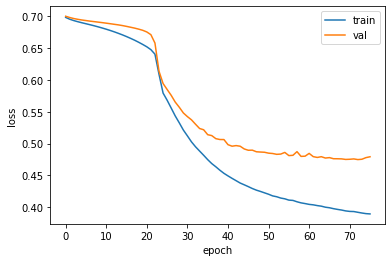

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

손실은 꾸준히 감소하고 있지만 검증 손실은 대략 스무 번째 에포크에서 감소가 둔해지고 있다.

In [53]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

Embedding 클래스의 첫 번째 매개변수(500)는 어휘 사전의 크기이다. imdb.load_data(num_words=500)과 같이 설정했기 때문에 매개변수의 값을 500으로 지정 

두 번째 매개변수(16)는 임베딩 벡터의 크기, 여기에서는 원-핫 인코딩 보다 훨씬 작은 크기(16)의 벡터를 사용했음 

세 번째 input_length 매개변수는 입력 시퀀스의 길이로 앞서 샘플의 길이를 100으로 맞추어 train_seq를 만들었고 따라서 이 값을 100으로 지정하였음 

그 다음 SimpleRNN 층과 Dense 층은 이전과 동일 

In [54]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


summary() 메서드의 출력에서 알 수 있듯, 모델은 (100,) 크기의 입력을 받아 (100, 16)크기의 출력을 만든다. 이 모델에서 사용되는 모델 파라미터 개수를 계산 

Embedding 클래스는 500개의 각 토큰의 크기가 16인 벡터로 변경하기 때문에 500 x 16= 8,000개의 모델 파라미터를 가짐, 그 다음 SimpleRNN 층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해 필요한 가중치가 16 x 8 = 128개를 가짐, 또한 은닉 상태에 곱해지는 가중치 8 x 8 = 64개가 있음 
마지막으로 8개의 절편이 있으므로 이 순환층에 있는 전체 모델 파라미터 개수는 128 + 64 + 8 = 200개입니다. 

마지막 Dense 층의 가중치 개수는 이전과 동일하게 9개 입니다. 

In [56]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

AttributeError: ignored

출력 결과를 보면 원-핫 인코딩을 사용한 모델과 비슷한 성능을 냈음, 반면 순환층의 가중치 개수는 훨씬 작고 훈련 세트 크기도 훨씬 줄어듦

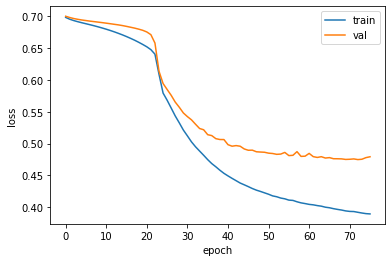

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

훈련 손실과 검증손실을 그래프로 출력해보았는데 검증 손실이 더 감소하지 않아 훈련이 적절히 조기종료되었음